<br><br><center><h1 style="font-size:3em;color:#2467C0">당뇨병 예측</h1></center>
<br>
<table>
<col width="450">
<tr>
<td><img src="hospital_regression.jpeg" align="middle" style="width:350px;height:200px;"/></td>
<td>
회귀 모델을 활용한 당뇨병 예측 프로젝트를 실습해본다.
</td>
</tr>
</table>

In [8]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import sklearn.datasets
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score

In [10]:
# sklearn에서 제공하는 당뇨병 데이터를 받아오는 과정
diabetes = sklearn.datasets.load_diabetes()

받아온 diabetes 데이터를 살펴보도록 하자.

sklearn에서 제공하는 데이터는 항상 다음과 같은 key와 그에 따른 value값을 가진다.

- data: 실제 데이터 
- target
- frame
- DESCR
- feature_name

In [11]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [12]:
print(diabetes['DESCR']) # print(diabetes.DESCR) 같은 결과 값 출력

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [13]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [14]:
len(diabetes['data'])

442

In [15]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [19]:
len(diabetes['target'])

442

In [20]:
X, Y = normalize(diabetes['data']), diabetes['target']

In [21]:
X

array([[ 0.32100597,  0.42726811,  0.52014127, ..., -0.02185454,
         0.16784162, -0.14876892],
       [-0.01166166, -0.27661579, -0.31895198, ..., -0.24471534,
        -0.4233959 , -0.57132977],
       [ 0.6574065 ,  0.39059633,  0.34258958, ..., -0.0199788 ,
         0.02207134, -0.1998475 ],
       ...,
       [ 0.42500219,  0.51642207, -0.1620822 , ..., -0.11289848,
        -0.47769422,  0.15784799],
       [-0.4486945 , -0.44049627,  0.38544135, ...,  0.26207406,
         0.43937866, -0.25586467],
       [-0.19283439, -0.18931106, -0.30969841, ..., -0.16747894,
        -0.01789509,  0.01299519]])

In [22]:
Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [23]:
print(X.shape, Y.shape)

(442, 10) (442,)


In [24]:
# train 과 test dataset으로 데이터 분할 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [25]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [26]:
# linear regression 실행
linear = LinearRegression()

In [27]:
linear

LinearRegression()

In [28]:
# train data로 학습 진행
linear.fit(X_train, Y_train)

LinearRegression()

In [29]:
# test data로 결과 확인
y_pred = linear.predict(X_test)

In [32]:
type(y_pred)

numpy.ndarray

In [33]:
# correlation 
corr_linear = pd.Series(y_pred).corr(pd.Series(Y_test))

In [34]:
# r2_score 을 통해서 모델의 성능 확인
rsquared_linear = r2_score(Y_test, y_pred)

In [35]:
rsquared_linear

0.4759476454559125

In [36]:
print("선형 계수:")
print(linear.coef_)

선형 계수:
[  4.88688724 -24.44121955  79.24066192  49.01388214  28.04833799
 -50.0461501  -30.80966486  36.0863634   60.94892294  10.98524705]


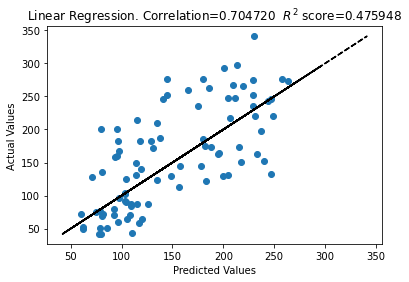

In [38]:
# 결과를 그림으로 표현
plt.scatter(y_pred, Y_test)
plt.title("Linear Regression. Correlation=%f  $R^2$ score=%f" % (corr_linear, rsquared_linear))
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
# 비교를 위해 x=y 라인 추가
plt.plot(Y_test, Y_test, 'k--')
plt.show()